In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
loan_data_raw = pd.read_csv('prosperLoanData.csv')

In [4]:
loan_data_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
loan_data_raw['EstimatedLoss'].describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

In [7]:
loan_data_raw['ProsperPaymentsOneMonthPlusLate'].value_counts()

0.0     21700
1.0       185
2.0        69
3.0        49
4.0        20
7.0        16
5.0        16
6.0         9
8.0         5
11.0        3
21.0        3
19.0        3
9.0         3
12.0        1
10.0        1
18.0        1
16.0        1
Name: ProsperPaymentsOneMonthPlusLate, dtype: int64

In [8]:
loan_data_raw['Occupation'].value_counts()[0:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

As there are 81 columns in this data set, a subset of the data will be copied for initial analysis. Assuming that 'EstimatedLoss' and 'EstimatedReturn' are dependent variables, the subset initially contains 17 independent variables and 2 dependent variables.

Independent Variables:

- AmountDelinquent
- BorrowerAPR
- BorrowerRate
- CreditScoreRangeUpper
- CreditScoreRangeLower
- DebtToIncomeRatio
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- LoanOriginalAmount
- Occupation
- PercentFunded
- ProserPaymentsLessThanOneMonthLate
- ProsperPaymentsOneMonthPlusLate
- ProsperPrincipalBorrowed
- ProsperPrincipalOutstanding
- ProsperRating (numeric)
- StatedMonthlyIncome

Dependent Variables:

- EstimatedLoss
- EstimatedReturn

In [9]:
loan_data = loan_data_raw[['AmountDelinquent', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeUpper', 'CreditScoreRangeLower',
                           'DebtToIncomeRatio', 'EmploymentStatus', 'EmploymentStatusDuration', 
                           'IsBorrowerHomeowner', 'LoanOriginalAmount', 'Occupation', 'PercentFunded', 
                           'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
                           'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 
                           'ProsperRating (numeric)', 'StatedMonthlyIncome', 'EstimatedLoss', 'EstimatedReturn']].copy()

Based on an initial view of the columns, it appears that the columns 'CreditScoreRangeUpper' and 'CreditScoreRangeLower' contain very similar data, likely provide similar information, and likely have a similar impact on other variables of interest. As a result, it may be worthwhile to create another variable that captures information from both of these variables and use that for analysis instead. This is done by creating another variable 'CreditScoreRangeAvg' that is the average of these two variables. In this way, we capture information from both columns while only needing to use one column.

In [10]:
loan_data['CreditScoreRangeAvg'] = 0
loan_data['CreditScoreRangeAvg'] = (loan_data['CreditScoreRangeUpper'] + loan_data['CreditScoreRangeLower']) / 2

In [11]:
loan_data[['CreditScoreRangeAvg', 'CreditScoreRangeUpper', 'CreditScoreRangeLower']].describe()

,CreditScoreRangeAvg,CreditScoreRangeUpper,CreditScoreRangeLower
count,113346.000000,113346.000000,113346.000000
mean,695.067731,704.567731,685.567731
std,66.458275,66.458275,66.458275
min,9.500000,19.000000,0.000000
25%,669.500000,679.000000,660.000000
50%,689.500000,699.000000,680.000000
75%,729.500000,739.000000,720.000000
max,889.500000,899.000000,880.000000


In [12]:
loan_data.drop(columns=['CreditScoreRangeUpper', 'CreditScoreRangeLower'], inplace=True)

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
AmountDelinquent                       106315 non-null float64
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
DebtToIncomeRatio                      105383 non-null float64
EmploymentStatus                       111682 non-null object
EmploymentStatusDuration               106312 non-null float64
IsBorrowerHomeowner                    113937 non-null bool
LoanOriginalAmount                     113937 non-null int64
Occupation                             110349 non-null object
PercentFunded                          113937 non-null float64
ProsperPaymentsLessThanOneMonthLate    22085 non-null float64
ProsperPaymentsOneMonthPlusLate        22085 non-null float64
ProsperPrincipalBorrowed               22085 non-null float64
ProsperPrincipalOutstanding            22085 non-null float64
ProsperRating (num

# 2. Data Exploration with Visuals

## A. Plot Matrix

To start this analysis, it may be helpful to have an overview of several different bivariate plots. The goal is to uncover any interesting bivariate relationships in data, view general distribution patterns, and observe any variables that contain similar information (as shown by a linear relationship) which is an indication of data that can and should be dropped. 

In [14]:
data_vars = ['AmountDelinquent', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeAvg',
                           'DebtToIncomeRatio', 'EstimatedLoss', 'EstimatedReturn']

C:\Users\Lou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


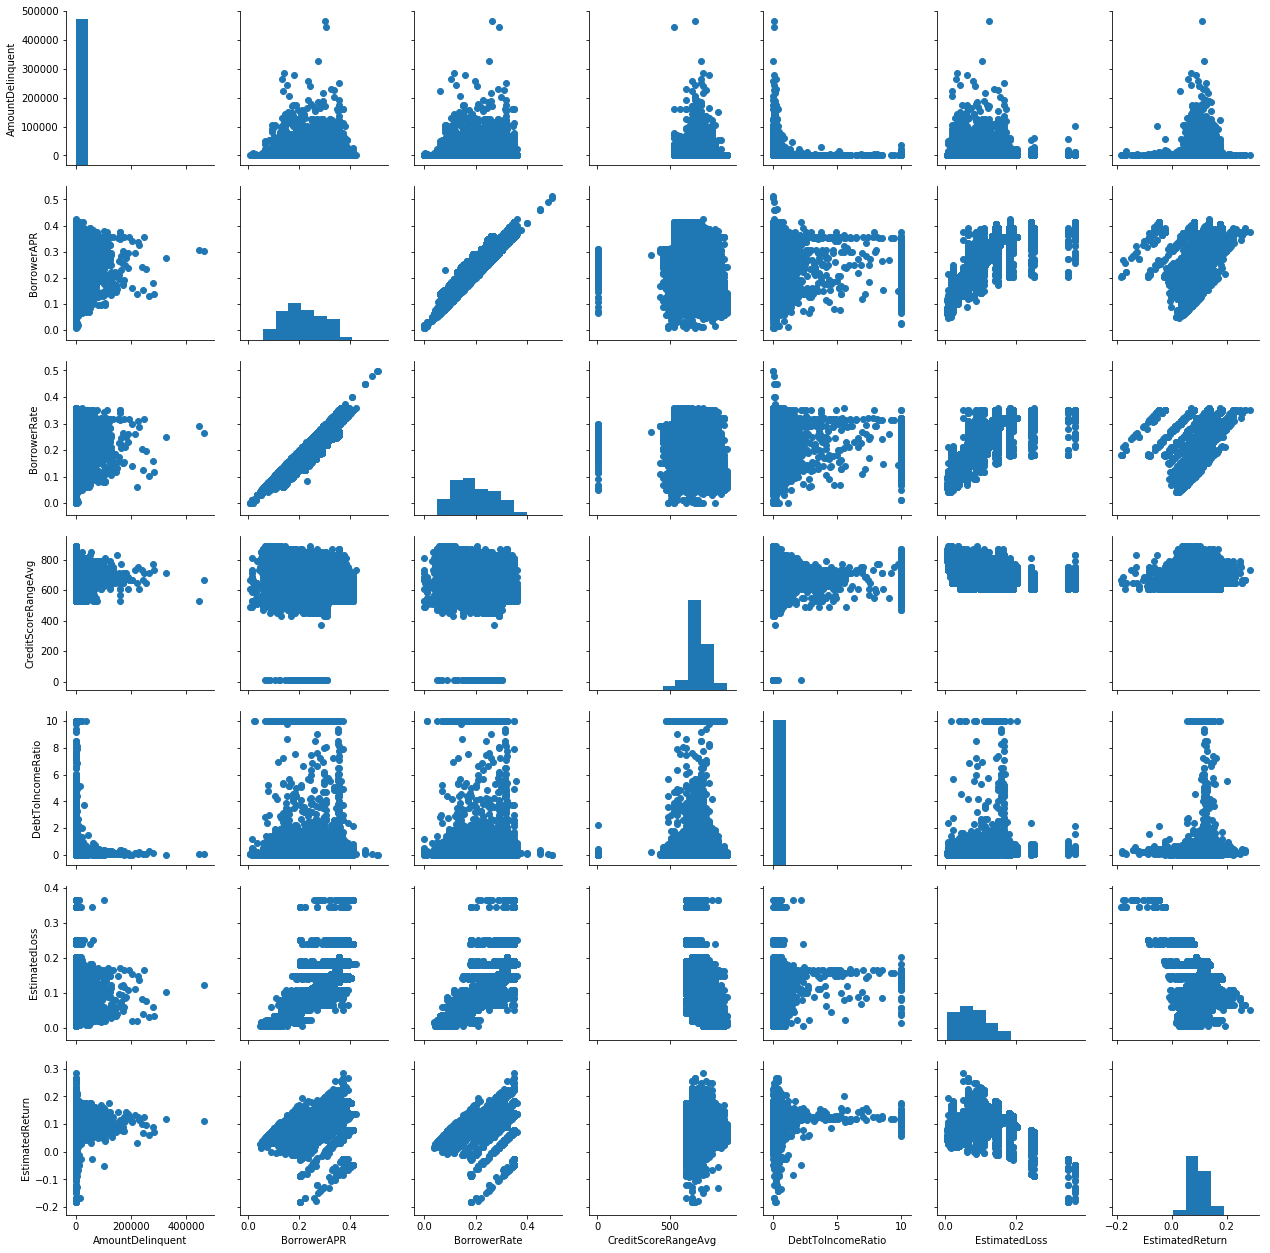

In [15]:
g = sns.PairGrid(data = loan_data, vars = data_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Based on the plot matrix above, it appears that an abundance of data has made the plots difficult to read due to overlapping. As a result, data will be examined in further detail. However, one obvious trend is that the columns 'BorrowerAPR' and 'BorrowerRate' have a nearly linear slope, meaning that they contain very similar data. Because of this, one of the columns should be dropped. as APR typically encompasses all borrowing costs that are not necessarily reflected in a borrower's rate, it appears to be a more accurate measure of borrowing costs; therefore the 'BorrowerAPR' column will be kept. The 'BorrowerRate' column will be dropped.

In [16]:
loan_data.drop(columns='BorrowerRate', inplace=True)

## B. Debt to Income Ratio

In [17]:
loan_data[loan_data['DebtToIncomeRatio'] > 1]['DebtToIncomeRatio'].value_counts()

10.01    272
1.02      12
1.06      11
1.01      11
1.05      11
        ... 
5.76       1
3.86       1
3.45       1
2.31       1
2.59       1
Name: DebtToIncomeRatio, Length: 258, dtype: int64

In [18]:
debt_ratio_greater_than_1_sum = loan_data[loan_data['DebtToIncomeRatio'] > 1]['DebtToIncomeRatio'].value_counts().sum() 
print('Number of loans and percent of loans with a Debt to Income Ratio greater than 1.0: ' + repr(debt_ratio_greater_than_1_sum) + ', ' + '{0:.2f}'.format(debt_ratio_greater_than_1_sum / loan_data.shape[0]) + '%')

Number of loans and percent of loans with a Debt to Income Ratio greater than 1.0: 799, 0.01%


In [19]:
loan_data['DebtToIncomeRatio'].value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.13774       1
0.04983       1
0.15248       1
0.19893       1
0.06056       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

Text(0.5, 1.0, 'Figure 1. Number of Loans by Debt to Income Ratio (Complete Distribution)')

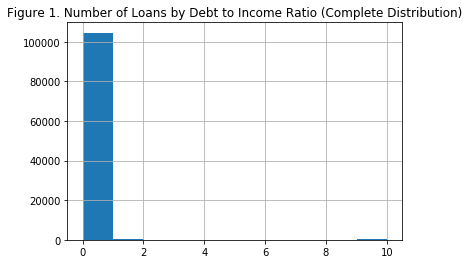

In [20]:
loan_data['DebtToIncomeRatio'].hist();
plt.title('Figure 1. Number of Loans by Debt to Income Ratio (Complete Distribution)')

The above plot shows the histogram for debt to income ratio. It is apparent that the vast majority of the loans (over 100,000 based on the above plot out of 113,346 based on the info() call). Per the data description for the Debt to Income Ratio, any debt-to-income, any ratios over 10 are labeled 10.01, regardless of how high it is.

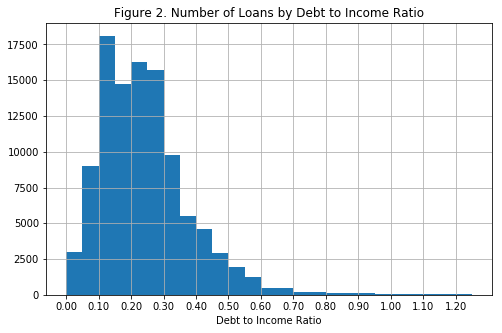

In [21]:
subplot = plt.figure(figsize = (8,5))

bins = np.arange(0, 1.3, .05)

ax = plt.subplot(1,1,1)

ax = loan_data['DebtToIncomeRatio'].hist(bins = bins)
bin_labels = ["{:0.2f}".format(i) for i in bins[::2]]
ax.set_xticks(bins[::2]);
ax.set_xticklabels(bin_labels)
ax.set_title('Figure 2. Number of Loans by Debt to Income Ratio')
ax.set_xlabel('Debt to Income Ratio');

Based on the plot above, it appears that a significant amount of borrowers have a debt to income ratio between 0.10 and 0.30, with the amount of borrowers with higher ratios trailing off significantly after approximately 0.30. The distribution for debt to income ratio is right skew.

Based on the plot matrix, debt to income ratio appears to have an interesting relationship with the amount delinquent and is worth investigating with bivariate plots.

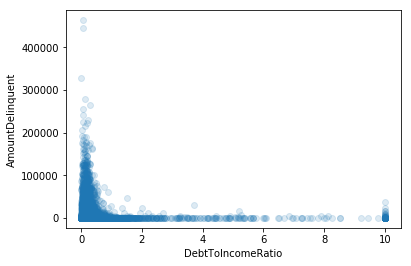

In [22]:
sns.regplot(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', fit_reg=False, scatter_kws = {'alpha': 0.15});

The plot above shows that lower debt to income ratios tend to have lower delinquent amounts. This is a counterintuitive observation, so this relationship merits further analysis.

In [23]:
# Confirm that we do not have null or infinite data in the specified columns
loan_data.dropna(subset=['DebtToIncomeRatio', 'AmountDelinquent'], inplace=True)
(loan_data['DebtToIncomeRatio'].isin([np.inf, -np.inf])).sum(), loan_data['DebtToIncomeRatio'].isna().sum()

(0, 0)

In [24]:
(loan_data['AmountDelinquent'].isin([np.inf, -np.inf])).sum(), loan_data['AmountDelinquent'].isna().sum()

(0, 0)

In [25]:
loan_data['DebtToIncomeRatio'].describe()

count    97905.000000
mean         0.276037
std          0.524517
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [26]:
loan_data.shape

(97905, 18)

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97905 entries, 0 to 113936
Data columns (total 18 columns):
AmountDelinquent                       97905 non-null float64
BorrowerAPR                            97905 non-null float64
DebtToIncomeRatio                      97905 non-null float64
EmploymentStatus                       97905 non-null object
EmploymentStatusDuration               97888 non-null float64
IsBorrowerHomeowner                    97905 non-null bool
LoanOriginalAmount                     97905 non-null int64
Occupation                             96572 non-null object
PercentFunded                          97905 non-null float64
ProsperPaymentsLessThanOneMonthLate    19915 non-null float64
ProsperPaymentsOneMonthPlusLate        19915 non-null float64
ProsperPrincipalBorrowed               19915 non-null float64
ProsperPrincipalOutstanding            19915 non-null float64
ProsperRating (numeric)                77557 non-null float64
StatedMonthlyIncome          

In [28]:
loan_data['DebtToIncomeRatio'].head()

0    0.17
1    0.18
3    0.15
4    0.26
5    0.36
Name: DebtToIncomeRatio, dtype: float64

In [29]:
loan_data[loan_data['AmountDelinquent'] > 0]['AmountDelinquent'].count()

15525

In [30]:
loan_data['AmountDelinquent'].describe()

count     97905.000000
mean       1003.278556
std        7154.286296
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [31]:
debt_ratio_step = 0.1
amt_del_step = 50000

In [32]:
debt_ratio_bins = np.arange(-0.1, loan_data['DebtToIncomeRatio'].max() + debt_ratio_step, debt_ratio_step)
delinquent_bins = np.arange(-0.1, loan_data['AmountDelinquent'].max() + amt_del_step, amt_del_step)

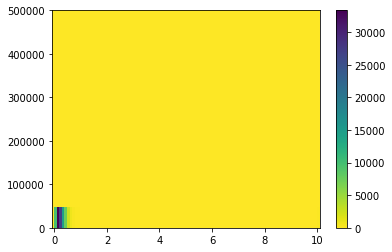

In [33]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r');
plt.colorbar();

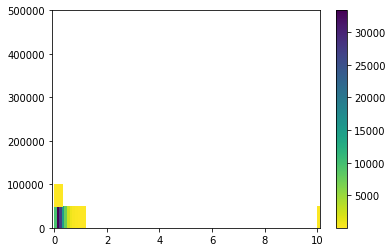

In [34]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r', cmin=50);
plt.colorbar();

In [35]:
debt_ratio_bins = np.arange(-0.1, 1.5, 0.1)
delinquent_bins = np.arange(-0.1, 10000, 500)

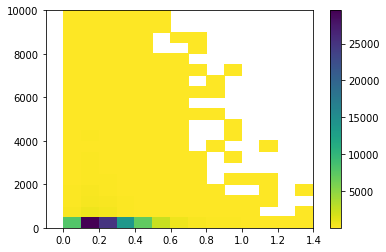

In [36]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r', cmin=1);
plt.colorbar();

In [37]:
debt_delinquent_data = loan_data.copy()

In [38]:
debt_ratio_step = .5
amt_del_step = 25000

In [39]:
debt_ratio_bins = np.arange(-debt_ratio_step, loan_data['DebtToIncomeRatio'].max() + debt_ratio_step, debt_ratio_step)
delinquent_bins = np.arange(-amt_del_step, loan_data['AmountDelinquent'].max() + amt_del_step, amt_del_step)

In [40]:
debt_ratio_bins

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
        5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5])

In [41]:
delinquent_bins

array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
       150000., 175000., 200000., 225000., 250000., 275000., 300000.,
       325000., 350000., 375000., 400000., 425000., 450000., 475000.])

In [42]:
len(debt_ratio_bins), len(delinquent_bins)

(23, 21)

In [43]:
loan_data['AmountDelinquent'].max()

463881.0

In [44]:
debt_indices = pd.cut(debt_delinquent_data['DebtToIncomeRatio'], debt_ratio_bins, labels=False).astype(int)
del_indices = pd.cut(debt_delinquent_data['AmountDelinquent'], delinquent_bins, labels=False).astype(int)

In [45]:
del_indices

0         1
1         0
3         1
4         0
5         0
         ..
113932    0
113933    1
113934    0
113935    0
113936    1
Name: AmountDelinquent, Length: 97905, dtype: int32

In [46]:
debt_del_grouped = debt_delinquent_data.groupby([debt_indices, del_indices]).size()
debt_del_grouped = debt_del_grouped.reset_index()
debt_del_grouped = debt_del_grouped.pivot(index = 'DebtToIncomeRatio', columns='AmountDelinquent').values
#debt_del_grouped = debt_delinquent_data.groupby([debt_indices, del_indices])
#x = debt_del_grouped.pivot(index=['DebtToIncomeRatio'], columns=['AmountDelinquent'])
#x

debt_del_grouped.shape

(22, 16)

In [47]:
weights = loan_data['AmountDelinquent']

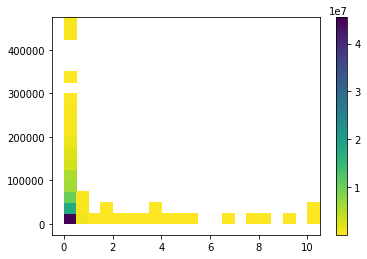

In [48]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], weights=weights, cmap='viridis_r', cmin=0.0001);
plt.colorbar();

In [49]:
loan_data['AmountDelinquent'].sum()

98225987.0

In [50]:
loan_data[(loan_data['AmountDelinquent'] < 25000) & (loan_data['DebtToIncomeRatio'] < .25)]['AmountDelinquent'].count()

54902

In [51]:
loan_data[(loan_data['AmountDelinquent'] < 100000) & (loan_data['DebtToIncomeRatio'] < .50)]['AmountDelinquent'].sum()

80035367.0

In [83]:
debt_ratio_step = .1
amt_del_step = 50000

In [125]:
loan_data_partial = loan_data[(loan_data['AmountDelinquent'] > 0) & (loan_data['AmountDelinquent'] < 250001) & (loan_data['DebtToIncomeRatio'] > 0) & (loan_data['DebtToIncomeRatio'] < .51)].copy()
loan_data_partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14922 entries, 0 to 113936
Data columns (total 18 columns):
AmountDelinquent                       14922 non-null float64
BorrowerAPR                            14922 non-null float64
DebtToIncomeRatio                      14922 non-null float64
EmploymentStatus                       14922 non-null object
EmploymentStatusDuration               14920 non-null float64
IsBorrowerHomeowner                    14922 non-null bool
LoanOriginalAmount                     14922 non-null int64
Occupation                             14764 non-null object
PercentFunded                          14922 non-null float64
ProsperPaymentsLessThanOneMonthLate    3190 non-null float64
ProsperPaymentsOneMonthPlusLate        3190 non-null float64
ProsperPrincipalBorrowed               3190 non-null float64
ProsperPrincipalOutstanding            3190 non-null float64
ProsperRating (numeric)                9831 non-null float64
StatedMonthlyIncome               

In [126]:
debt_ratio_bins = np.arange(-debt_ratio_step, loan_data_partial['DebtToIncomeRatio'].max() + debt_ratio_step, debt_ratio_step)
delinquent_bins = np.arange(-amt_del_step, loan_data_partial['AmountDelinquent'].max() + amt_del_step, amt_del_step)

In [127]:
debt_indices = pd.cut(loan_data_partial['DebtToIncomeRatio'], debt_ratio_bins, labels=False).astype(int)
del_indices = pd.cut(loan_data_partial['AmountDelinquent'], delinquent_bins, labels=False).astype(int)

In [128]:
loan_data_partial['debt_ratio_index'] = debt_indices
loan_data_partial['delinquent_index'] = del_indices

In [129]:
loan_data_partial.head(10)

,AmountDelinquent,BorrowerAPR,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount,Occupation,PercentFunded,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperRating (numeric),StatedMonthlyIncome,EstimatedLoss,EstimatedReturn,CreditScoreRangeAvg,debt_ratio_index,delinquent_index
0,472.0,0.16516,0.17,Self-employed,2.0,True,9425,Other,1.0,NaN,NaN,NaN,NaN,NaN,3083.333333,NaN,NaN,649.5,2,1
3,10056.0,0.12528,0.15,Employed,113.0,True,10000,Skilled Labor,1.0,NaN,NaN,NaN,NaN,6.0,2875.000000,0.0249,0.06000,809.5,2,1
10,253.0,0.27462,0.12,Employed,300.0,False,13500,Fireman,1.0,NaN,NaN,NaN,NaN,4.0,7500.000000,0.0890,0.14420,649.5,2,1
11,2224.0,0.15033,0.27,Full-time,19.0,False,1000,Waiter/Waitress,1.0,NaN,NaN,NaN,NaN,NaN,1666.666667,NaN,NaN,649.5,3,1
16,2469.0,0.30748,0.15,Full-time,133.0,True,4000,Professional,1.0,0.0,0.0,10700.0,4064.87,2.0,8291.666667,0.1225,0.12480,649.5,2,1
21,5200.0,0.21488,0.09,Full-time,36.0,False,3000,Professional,1.0,NaN,NaN,NaN,NaN,NaN,3750.000000,NaN,NaN,629.5,1,1
30,42488.0,0.12782,0.11,Employed,44.0,False,10000,Other,1.0,NaN,NaN,NaN,NaN,6.0,3750.000000,0.0380,0.05170,749.5,2,1
34,15543.0,0.22966,0.17,Other,426.0,True,10000,NaN,1.0,NaN,NaN,NaN,NaN,4.0,4058.333333,0.0899,0.07820,649.5,2,1
45,2629.0,0.13227,0.13,Employed,28.0,True,25000,Executive,1.0,NaN,NaN,NaN,NaN,6.0,16000.000000,0.0299,0.06660,749.5,2,1
50,579.0,0.23984,0.12,Employed,43.0,True,10000,Nurse (RN),1.0,NaN,NaN,NaN,NaN,3.0,7916.666667,0.1025,0.08578,649.5,2,1


In [136]:
loan_data_partial_grouped = loan_data_partial.groupby([debt_indices, del_indices]).sum()
#debt_del_grouped = debt_del_grouped.reset_index()
#debt_del_grouped = debt_del_grouped.pivot(index = 'DebtToIncomeRatio', columns='AmountDelinquent').values

In [137]:
loan_data_partial_grouped.index.set_names(names = ['DebtRatioBin', 'AmtDelinquentBin'], inplace=True)

In [138]:
loan_data_partial_grouped = debt_del_grouped.reset_index()

In [139]:
loan_data_partial_grouped = loan_data_partial_grouped.drop(columns=['debt_ratio_index', 'delinquent_index'])
loan_data_partial_grouped

,index,DebtRatioBin,AmtDelinquentBin,AmountDelinquent,BorrowerAPR,DebtToIncomeRatio,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount,PercentFunded,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperRating (numeric),StatedMonthlyIncome,EstimatedLoss,EstimatedReturn,CreditScoreRangeAvg
0,0,1,1,17107487.0,739.20698,202.77,265431.0,1331.0,13485381,2966.7106,389.0,34.0,2224476.52,613808.67,5946.0,1.765444e+07,168.4341,182.80428,1954913.0
1,1,1,2,5266410.0,19.40007,4.79,6776.0,59.0,473075,74.8737,15.0,2.0,171400.00,36019.88,212.0,6.193520e+05,5.6325,6.30058,50692.5
2,2,1,3,2613249.0,5.41745,1.51,2690.0,20.0,185558,21.8058,0.0,0.0,11000.00,0.00,79.0,1.778462e+05,1.8448,2.23204,15349.0
3,3,1,4,1401483.0,2.30375,0.54,1043.0,6.0,48500,8.0000,2.0,0.0,4550.00,0.02,18.0,6.078958e+04,0.6728,0.69863,5216.0
4,4,1,5,673328.0,0.65072,0.17,130.0,1.0,20000,3.0000,0.0,0.0,15000.00,5020.14,14.0,3.570833e+04,0.2074,0.30210,2088.5
5,5,2,1,24635113.0,1403.81326,873.17,541742.0,2880.0,35101274,5611.2672,957.0,79.0,6736785.45,2453815.31,13126.0,3.129686e+07,356.3164,390.10910,3731630.0
6,6,2,2,5801983.0,21.64412,13.65,9771.0,62.0,732135,86.8251,41.0,5.0,315425.55,72479.54,280.0,6.516735e+05,7.0563,7.84596,59966.5
7,7,2,3,4387475.0,8.40160,5.55,4079.0,32.0,372301,36.0000,22.0,0.0,154700.00,39587.72,138.0,2.816119e+05,3.1912,3.15777,25182.0
8,8,2,4,1345869.0,2.20483,1.13,771.0,7.0,70600,8.0000,0.0,0.0,0.00,0.00,22.0,5.580375e+04,0.5052,0.61607,5296.0
9,9,2,5,439053.0,0.43216,0.32,55.0,1.0,12500,2.0000,0.0,0.0,5000.00,1535.04,9.0,9.166667e+03,0.1320,0.16260,1379.0


In [121]:
loan_data_partial_grouped['AmountDelinquent'].describe()

count    2.200000e+01
mean     4.268867e+06
std      6.322727e+06
min      1.012120e+05
25%      5.442110e+05
50%      1.446710e+06
75%      5.046676e+06
max      2.463511e+07
Name: AmountDelinquent, dtype: float64

In [122]:
loan_data_partial_grouped['AmountDelinquent'].sum() / loan_data['AmountDelinquent'].sum()

0.9561123778781678

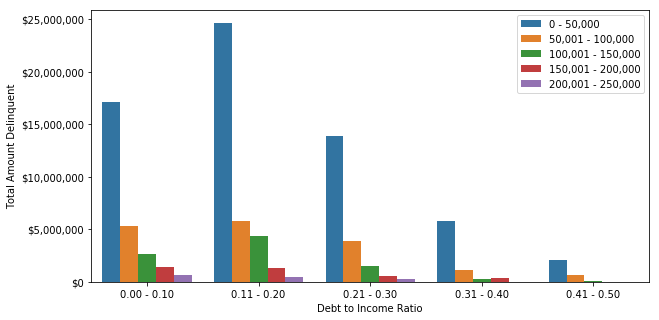

In [191]:
plt.figure(figsize=(10,5))
g = sns.barplot(data = loan_data_partial_grouped, x='DebtRatioBin', hue='AmtDelinquentBin', y='AmountDelinquent', ci=None);
g.legend(loc=1)

x_labels = []
legend_labels = []

# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_partial_grouped['DebtRatioBin'].min(), loan_data_partial_grouped['DebtRatioBin'].max() + 1):
    if i == loan_data_partial_grouped['DebtRatioBin'].min():
        label_min = debt_ratio_bins[i]
    else:
        label_min = debt_ratio_bins[i] + 0.01 
    label_max = debt_ratio_bins[i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)

# Modify labels so they show commas and whole numbers
y_labels = ['${:,.0f}'.format(t) for t in g.get_yticks()]    

# Create labels for Amount Delinquent ranges for legend
for i in range(loan_data_partial_grouped['AmtDelinquentBin'].min(), loan_data_partial_grouped['AmtDelinquentBin'].max() + 1):
    if i == loan_data_partial_grouped['AmtDelinquentBin'].min():
        label_min = delinquent_bins[i]
    else: 
        label_min = delinquent_bins[i] + 1   
    label_max = delinquent_bins[i + 1]
    label = str('{:,.0f}'.format(label_min)) + ' - ' + str('{:,.0f}'.format(label_max))
    legend_labels.append(label)    
    
g.set(xticklabels=x_labels, yticklabels=y_labels)
g.set(xlabel='Debt to Income Ratio', ylabel='Total Amount Delinquent');
plt.legend(legend_labels, loc=1);

In [158]:
g.get_yticks()

array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
       30000000.])

In [149]:
loan_data_partial[loan_data_partial['debt_ratio_index'] == 2]['DebtToIncomeRatio'].max()

0.2

In [68]:
#Function to return basic descriptive data based on debt to income ratio bins
def amt_delinquent_data(ratio_index):
    return {'count' : loan_data_partial[loan_data_partial['debt_ratio_index'] == ratio_index]['AmountDelinquent'].count(), 
        'sum' : loan_data_partial[loan_data_partial['debt_ratio_index'] == ratio_index]['AmountDelinquent'].sum(), 
        'mean' : loan_data_partial[loan_data_partial['debt_ratio_index'] == ratio_index]['AmountDelinquent'].mean(),
        'min' : loan_data_partial[loan_data_partial['debt_ratio_index'] == ratio_index]['AmountDelinquent'].min(), 
        'max' : loan_data_partial[loan_data_partial['debt_ratio_index'] == ratio_index]['AmountDelinquent'].max()} 

In [70]:
#Used as a sanity check to ensure that plots are consistent with data
for i in range(1,6):
    print(amt_delinquent_data(i)['sum'], amt_delinquent_data(i)['mean'], amt_delinquent_data(i)['count'])

27061957.0 8780.64795587281 3082
36609493.0 6363.5482357031115 5753
19979618.0 5466.37975376197 3655
7454007.0 4211.303389830508 1770
2810007.0 4244.723564954683 662


In [ ]:
debt_del_grouped.ffill()
debt_del_grouped = debt_del_grouped.reindex(pd.RangeIndex(len(debt_ratio_bins) + 1))
debt_del_grouped.fillna(0, inplace=True)
debt_del_grouped.index
#debt_del_grouped.drop(columns=['count'])

In [ ]:
debt_indices.max()

In [ ]:
debt_del_grouped.columns[-1][1]

In [ ]:
s = debt_del_grouped['sum']
s

In [ ]:
for i in range(s.columns[-1] + 1, len(delinquent_bins) + 2):
    s.loc[i] = 0

In [ ]:
cols = np.arange(0, len(delinquent_bins) + 2)
cols

for c in cols:
    if c not in(s.columns):
        s.loc[c] = 0

In [ ]:
s

In [ ]:
s = s.sort_index(axis=1)
s

In [ ]:
debt_del_grouped['sum']

In [ ]:
s = s.drop(s.loc[102])

In [ ]:
s = s.drop(columns=13)

In [ ]:
s

In [ ]:
plt.hist2d(data = loan_data, x = 'AmountDelinquent', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r', cmin=1, weights=s);
plt.colorbar();

In [ ]:
d = debt_del_grouped.reset_index()
d['sum']

In [ ]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], weights='debt_del_grouped', cmap='viridis_r');
plt.colorbar();

In [ ]:
x = pd.pivot_table(debt_del_grouped, index = ['DebtToIncomeRatio', 'AmountDelinquent'], values='sum')
x.reset_index()

In [ ]:
loan_data['AmountDelinquent'].sum(), debt_delinquent_data['AmountDelinquent'].sum(), '{:0.2f}'.format(100 * (debt_delinquent_data['AmountDelinquent'].sum() / loan_data['AmountDelinquent'].sum()))

In [ ]:
weights = np.zeros((len(debt_ratio_bins) + 1, len(delinquent_bins) + 1))
weights.shape

In [ ]:
type(debt_del_grouped)

In [ ]:
for i in range(0, weights.shape[0]):
    for j in range(0, weights.shape[1]):
        
        weights[i,j] = debt_del_grouped[(debt_del_grouped['DebtToIncomeRatio'] == i) & (debt_del_grouped['AmountDelinquent'] == j)]['sum']

In [ ]:
debt_delinquent_data

In [ ]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r', cmin=1);
plt.colorbar();

In [ ]:
debt_delinquent_data = loan_data.copy()

drop_debt_idx = debt_delinquent_data[debt_delinquent_data['DebtToIncomeRatio'] > 1].index
debt_delinquent_data.drop(drop_debt_idx, inplace=True)

drop_delinquent_idx = debt_delinquent_data[debt_delinquent_data['AmountDelinquent'] > 4000].index
debt_delinquent_data.drop(drop_delinquent_idx, inplace=True)

debt_delinquent_data.info()

In [ ]:
#sns.countplot(data = debt_delinquent_data, x = 'DebtToIncomeRatio', hue='AmountDelinquent')

In [ ]:
debt_indices

In [ ]:
#debt_del_grouped = debt_del_grouped.pivot(index='DebtToIncomeRatio', columns='AmountDelinquent', values='Count').values

In [ ]:
debt_del_grouped[0:5]

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data = debt_del_grouped, x = 'DebtToIncomeRatio', y = 'Count', hue = 'AmountDelinquent');

In [ ]:
loan_data['AmountDelinquent'].shape[0], debt_delinquent_data['AmountDelinquent'].shape[0]

In [ ]:
loan_data_bin_counts = loan_data.groupby(bin_indices).size()
loan_data_bin_counts.value_counts()
#loan_data['EstimatedReturn'].isna().sum()

In [ ]:
drc = debt_ratio_counts.pivot(index = 'DebtToIncomeRatio', columns='AmountDelinquent', values=0)

In [ ]:
drc.fillna(0, inplace=True)

In [ ]:
drc

In [ ]:
debt_ratio_counts = loan_data.groupby([bin_indices, del_indices]).size()

In [ ]:
debt_ratio_counts.head()

In [ ]:
debt_ratio_counts = debt_ratio_counts.reset_index()
debt_ratio_counts

In [ ]:
loan_data_debt_

In [ ]:

#cut_labels = ['{:0.2f}'.format(b) for b in cut_bins]
bin_indices = pd.cut(loan_data['DebtToIncomeRatio'], debt_ratio_bins, labels=False).astype(int)
del_indices = pd.cut(loan_data['AmountDelinquent'], delinquent_bins, labels=False).astype(int)

debt_ratio_counts = loan_data.groupby([bin_indices, del_indices]).size()

In [ ]:
bin_indices = pd.cut(loan_data['DebtToIncomeRatio'], debt_ratio_bins, labels=False).astype(int)
del_indices = pd.cut(loan_data['AmountDelinquent'], delinquent_bins, labels=False).astype(int)

#debt_ratio_counts = loan_data.groupby([bin_indices, del_indices]).size()